In [1]:
# import needed libraries
# data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Ignore warning messages to improve code readability and suppress unnecessary output
import warnings
warnings.filterwarnings('ignore')



# Importing necessary encoder and progress bar libraries
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


# necessary scalers for feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler


# handling imbalanced datasets and performing resampling techniques
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# data splitting, model evaluation metrics, cross-validation, hyperparameter tuning, and classification performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve


# necessary classifiers for building machine learning models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Reading the dataset and displaying the first five entries
data = pd.read_csv(r'C:\Users\aksha\Downloads\Hw3\hw3-classification-challenge-akshay2904\data\bank_train.csv')
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [3]:
# Using LabelEncoder to encode the target variable with integer values

le = LabelEncoder()

data['y'] = le.fit_transform(data['y'])

In [4]:
# Displaying information about the dataset using data.info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44211 entries, 0 to 44210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44211 non-null  int64 
 1   age         44211 non-null  int64 
 2   job         44211 non-null  object
 3   marital     44211 non-null  object
 4   education   44211 non-null  object
 5   default     44211 non-null  object
 6   balance     44211 non-null  int64 
 7   housing     44211 non-null  object
 8   loan        44211 non-null  object
 9   contact     44211 non-null  object
 10  day         44211 non-null  int64 
 11  month       44211 non-null  object
 12  campaign    44211 non-null  int64 
 13  pdays       44211 non-null  int64 
 14  previous    44211 non-null  int64 
 15  poutcome    44211 non-null  object
 16  y           44211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.6+ MB


In [5]:
# Retrieving the column names of the dataset using data.columns

data.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Checking the data types of the columns using data.dtypes

data.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
campaign       int64
pdays          int64
previous       int64
poutcome      object
y              int32
dtype: object

In [7]:
# Checking the shape of the dataset using data.shape

data.shape

(44211, 17)

In [8]:
# Display a heatmap to visualize missing values in a dataframe

def display_missing_values_heatmap(dataframe, figsize=(6, 3), cmap='viridis', fontsize=12):

    plt.figure(figsize=figsize)
    sns.heatmap(dataframe.isnull(), cmap=cmap)
    plt.title("Missing Values Heatmap", fontsize=fontsize)
    plt.xlabel("Columns", fontsize=fontsize)
    plt.ylabel("Rows", fontsize=fontsize)
    plt.show()

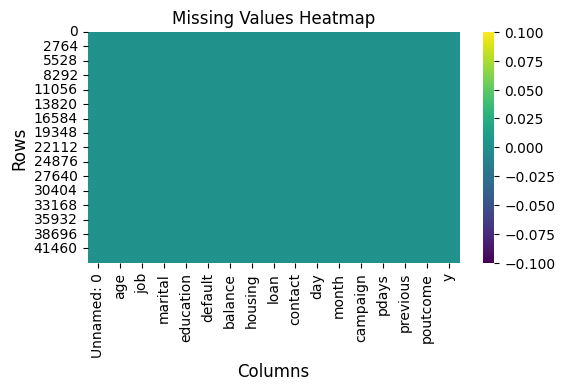

In [9]:
display_missing_values_heatmap(data)

In [10]:
# Calculating the percentage of missing values in each column

data.isna().sum()/len(data)

Unnamed: 0    0.0
age           0.0
job           0.0
marital       0.0
education     0.0
default       0.0
balance       0.0
housing       0.0
loan          0.0
contact       0.0
day           0.0
month         0.0
campaign      0.0
pdays         0.0
previous      0.0
poutcome      0.0
y             0.0
dtype: float64

In [11]:
# Generating descriptive statistics of the dataset

data.describe()

,Unnamed: 0,age,balance,day,campaign,pdays,previous,y
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000
mean,22614.856846,40.930040,1363.799462,15.811676,2.762751,40.210626,0.580715,0.117527
std,13057.312051,10.620088,3052.574757,8.324843,3.094049,100.114045,2.311291,0.322051
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,11306.500000,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,22616.000000,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,33931.500000,48.000000,1430.000000,21.000000,3.000000,-1.000000,0.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,58.000000,871.000000,275.000000,1.000000


In [12]:
# Generating descriptive statistics for categorical columns in the dataset and transposing the result

data.describe(include='O').T

,count,unique,top,freq
job,44211,12,blue-collar,9500
marital,44211,3,married,26632
education,44211,4,secondary,22697
default,44211,2,no,43418
housing,44211,2,yes,24563
loan,44211,2,no,37133
contact,44211,3,cellular,28645
month,44211,12,may,13474
poutcome,44211,4,unknown,36132


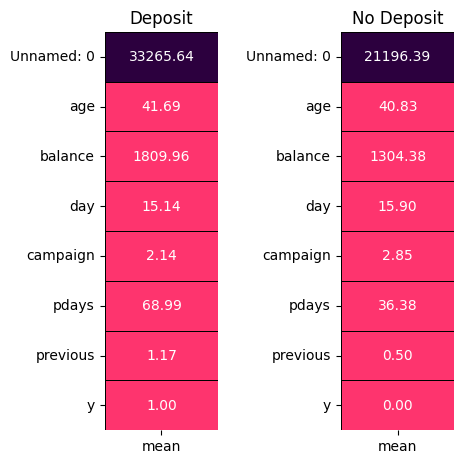

In [13]:
# Comparing the mean values of descriptive statistics for the 'y=1' (Deposit) and 'y=0' (No Deposit) groups using heatmaps

Deposit = data[data['y'] == 1].describe().T
no_Deposit = data[data['y'] == 0].describe().T

colors = ['#fe346e','#512b58','#2c003e']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(Deposit[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Deposit')

plt.subplot(1,2,2)
sns.heatmap(no_Deposit[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Deposit')

fig.tight_layout(pad = 2)

In [14]:
# Differentiating numerical and categorical features in the dataset and creating a copy of the dataset

numerical_features = []
categorical_features = []

for i in list(data.columns):
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

data1 = data.copy(deep=True)

Numerical Features:
['Unnamed: 0', 'age', 'job', 'balance', 'day', 'month', 'campaign', 'pdays', 'previous']

Categorical Features:
['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']


In [15]:
# Applying label encoding to transform categorical features into numerical representations

le = LabelEncoder()
text_cols = list(data1.select_dtypes(include=['object']).columns)


l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_cols):
    data1[i] = le.fit_transform(data1[i])
    l3.append(list(data1[i].unique())); l4.append(list(le.inverse_transform(data1[i].unique())))
    print(i,' : ',data1[i].unique(),' = ',le.inverse_transform(data1[i].unique()))

Label Encoder Transformation


100%|██████████| 9/9 [00:00<00:00, 93.62it/s]

job  :  [ 4  9  2  1 11  5  0  7  6 10  3  8]  =  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital  :  [1 2 0]  =  ['married' 'single' 'divorced']
education  :  [2 1 3 0]  =  ['tertiary' 'secondary' 'unknown' 'primary']
default  :  [0 1]  =  ['no' 'yes']
housing  :  [1 0]  =  ['yes' 'no']
loan  :  [0 1]  =  ['no' 'yes']
contact  :  [2 0 1]  =  ['unknown' 'cellular' 'telephone']
month  :  [ 8  6  5  1 10  9  2  4  3  7  0 11]  =  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome  :  [3 0 1 2]  =  ['unknown' 'failure' 'other' 'success']


In [16]:
# Creating a dictionary to map label-encoded values back to their original categorical values

tf1 = {}
for i in range(len(text_cols)):
    tf1[text_cols[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_cols[i]][j] = k

tf1['y'] = {0 : 'No Deposit', 1 : 'Deposit'}
tf1

{'job': {4: 'management',
  9: 'technician',
  2: 'entrepreneur',
  1: 'blue-collar',
  11: 'unknown',
  5: 'retired',
  0: 'admin.',
  7: 'services',
  6: 'self-employed',
  10: 'unemployed',
  3: 'housemaid',
  8: 'student'},
 'marital': {1: 'married', 2: 'single', 0: 'divorced'},
 'education': {2: 'tertiary', 1: 'secondary', 3: 'unknown', 0: 'primary'},
 'default': {0: 'no', 1: 'yes'},
 'housing': {1: 'yes', 0: 'no'},
 'loan': {0: 'no', 1: 'yes'},
 'contact': {2: 'unknown', 0: 'cellular', 1: 'telephone'},
 'month': {8: 'may',
  6: 'jun',
  5: 'jul',
  1: 'aug',
  10: 'oct',
  9: 'nov',
  2: 'dec',
  4: 'jan',
  3: 'feb',
  7: 'mar',
  0: 'apr',
  11: 'sep'},
 'poutcome': {3: 'unknown', 0: 'failure', 1: 'other', 2: 'success'},
 'y': {0: 'No Deposit', 1: 'Deposit'}}

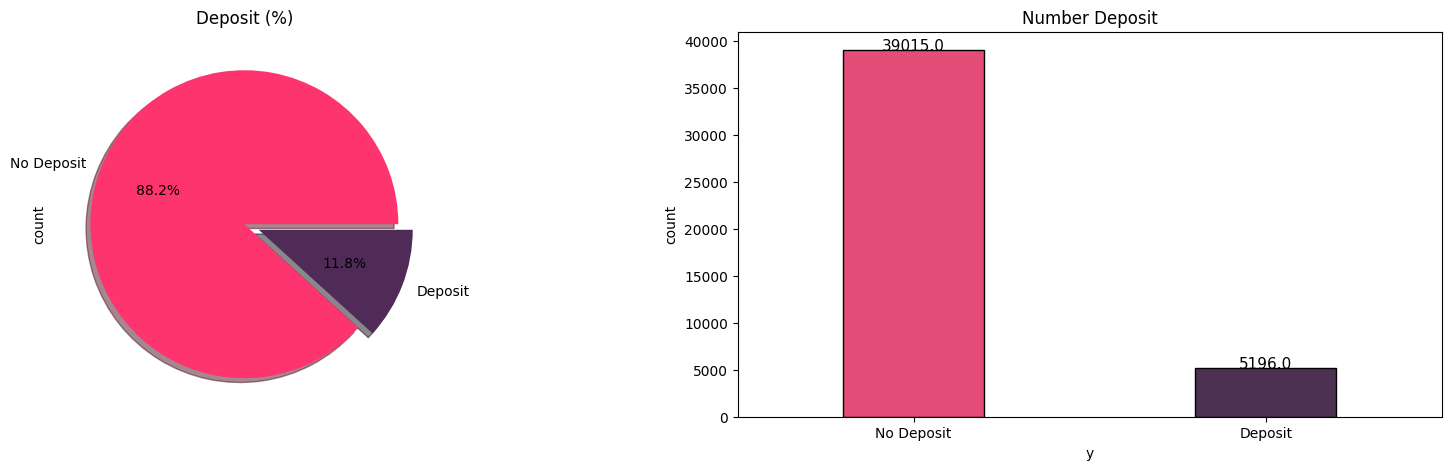

In [17]:
# Visualizing the distribution of the target variable 'y' using a pie chart and a countplot

l = data['y'].value_counts()

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
l.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, labels=['No Deposit','Deposit'], colors=colors)
plt.title('Deposit (%)')


plt.subplot(1,2,2)
ax = sns.countplot(x='y',data = data1, palette = colors,edgecolor = 'black', width=0.4)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Deposit','Deposit'])
plt.title('Number Deposit')
plt.show()

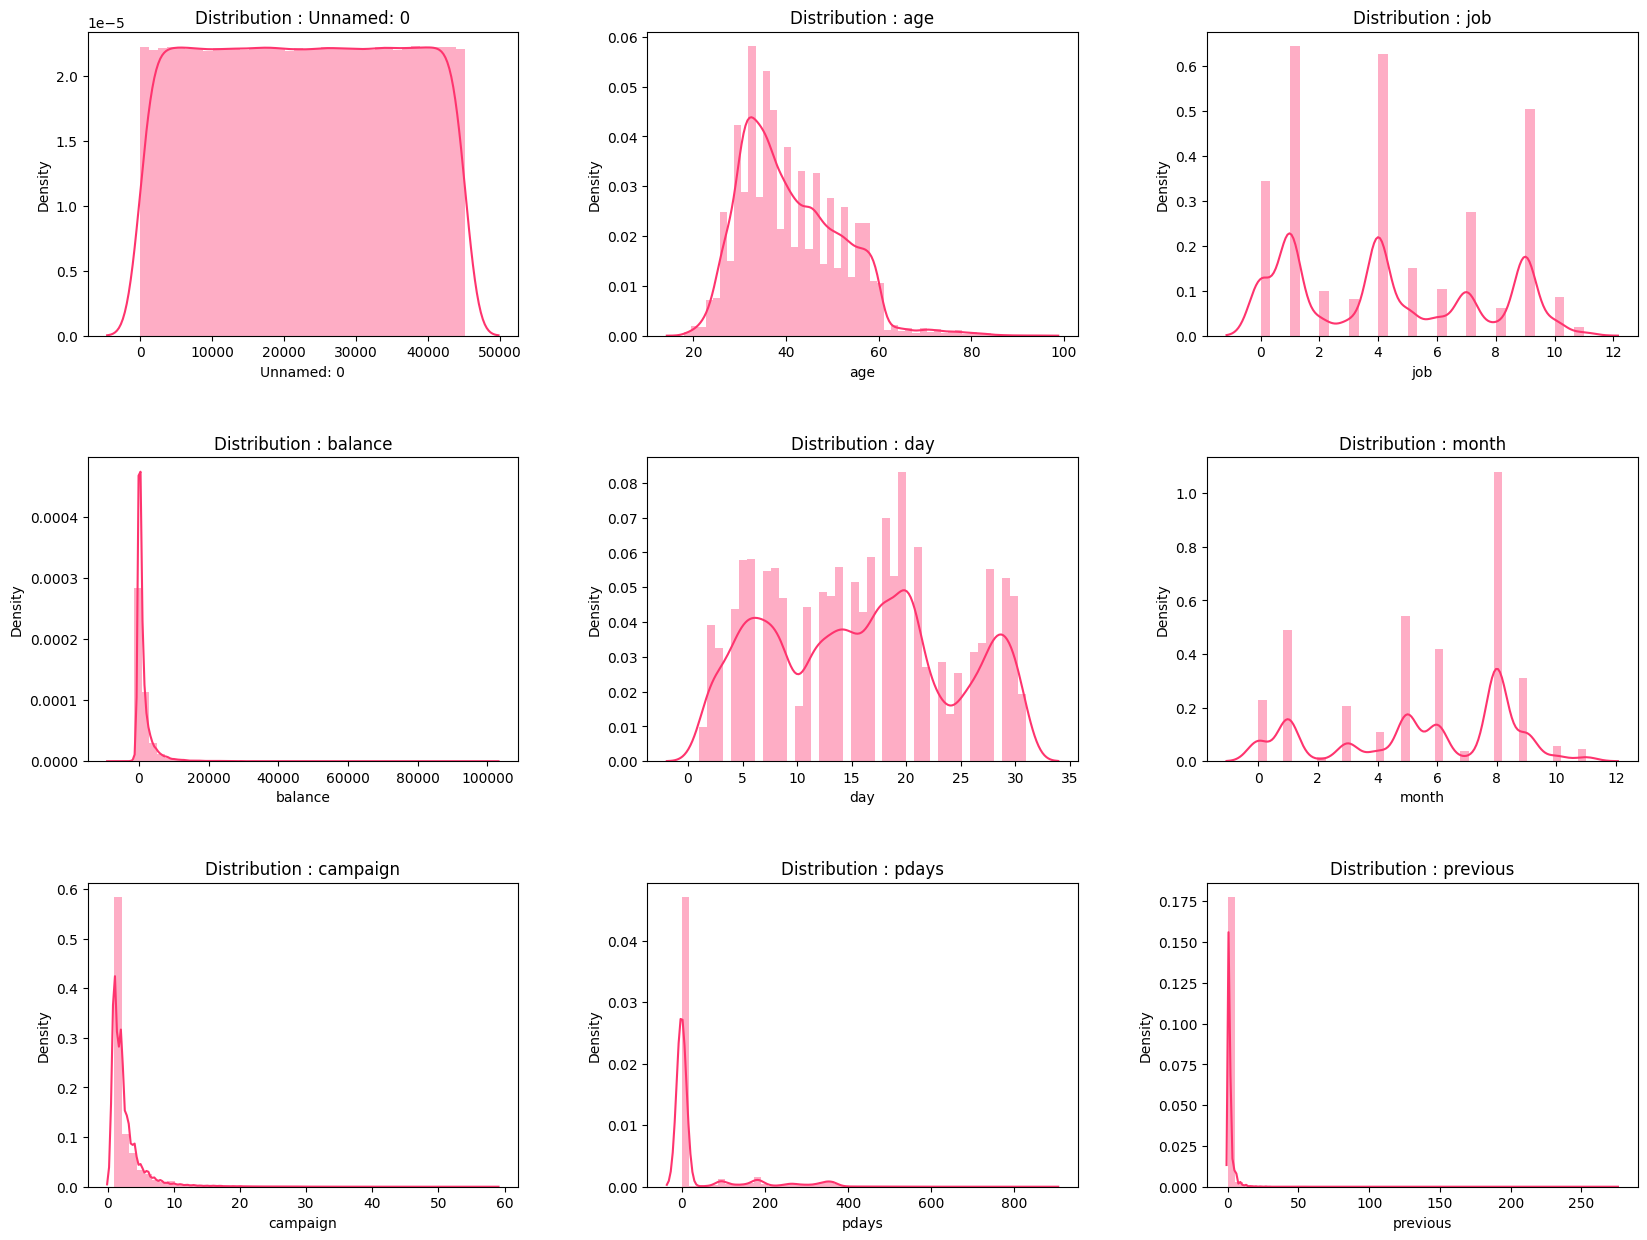

In [18]:
# Visualizing the distributions of numerical features using subplots of histograms

fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (20,15))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)

plt.show()

In [19]:
# Removing the 'y' column from the list of categorical features as it is the target variable
# This is necessary to examine categorical features without including the target

categorical_features.remove('y')

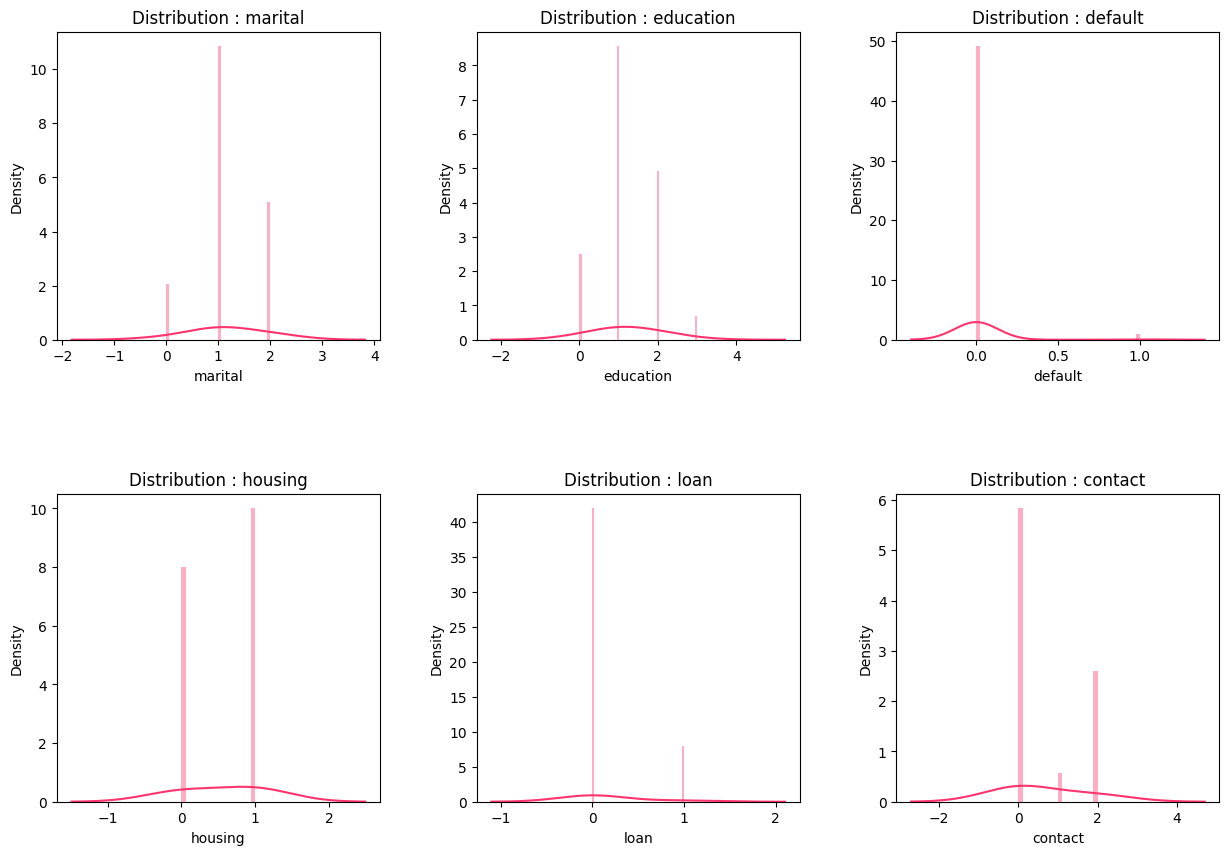

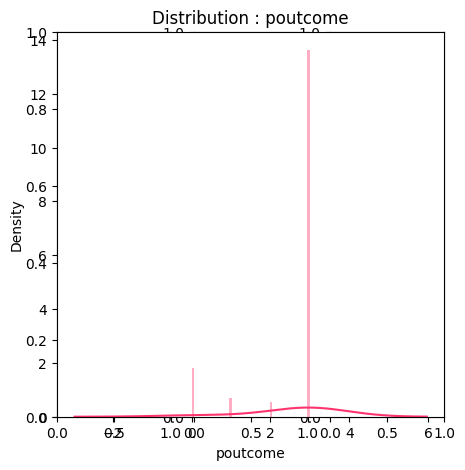

In [20]:
# Visualizing the distributions of categorical features using subplots of histograms

fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i in range(6):
    plt.subplot(2,3,i+1)
    sns.distplot(data1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0])
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (5,5))
for i in range(-1, -2, -1):
    plt.subplot(1,1,-i)
    sns.distplot(data1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

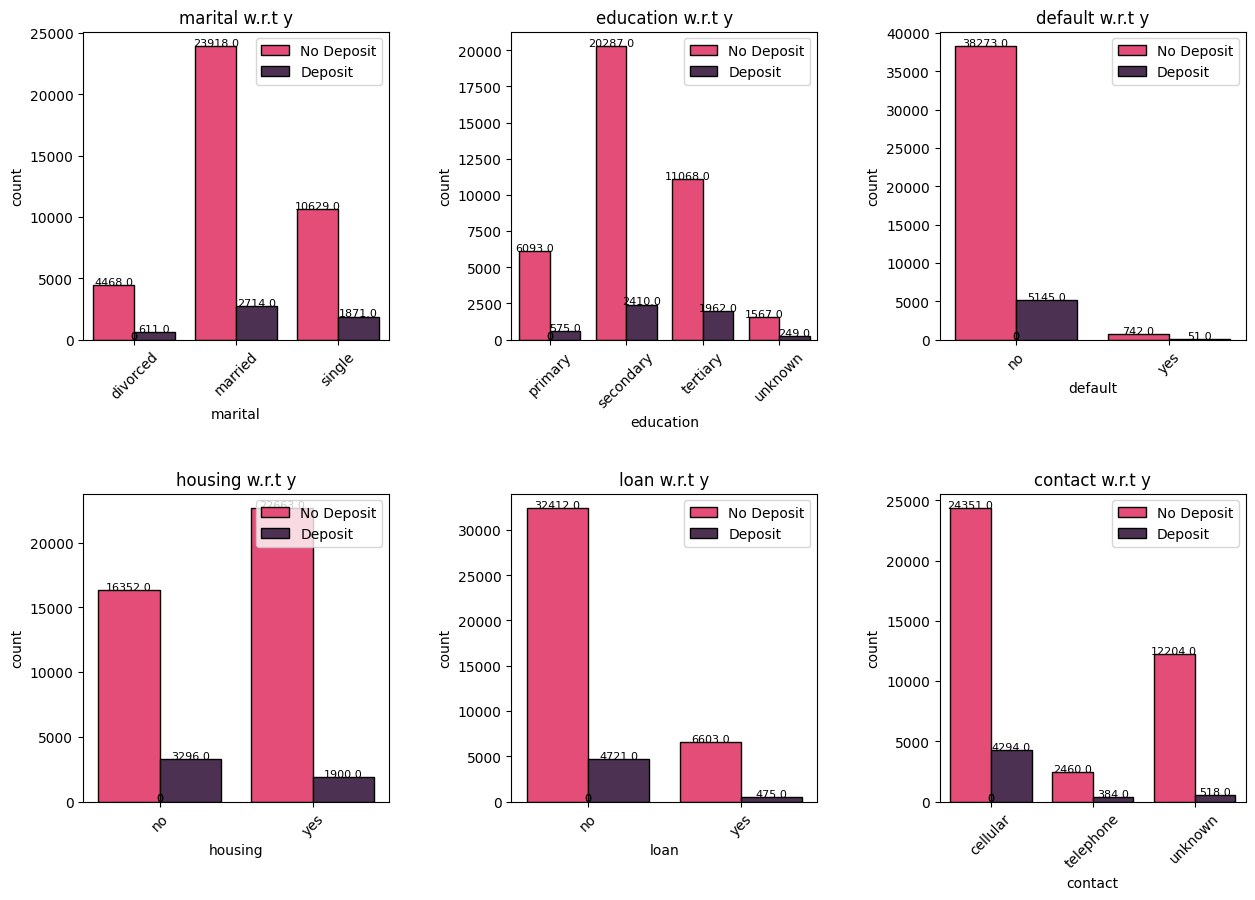

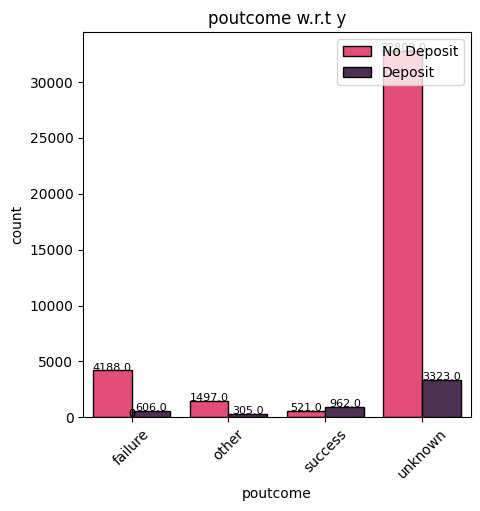

In [21]:
# Visualizing the relationship between categorical features and the target variable 'y' using countplots

fig = plt.subplots(nrows = 2,ncols = 3,figsize = (15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.5)
for i in range(6):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=categorical_features[i],data = data1,hue = "y",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 8)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(data1[categorical_features[i]].unique())])
    plt.legend(['No Deposit', 'Deposit'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t y'
    plt.xticks(rotation=45)
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))
for i in range(-1,-2,-1):
    plt.subplot(1,1,-i)
    ax = sns.countplot(x=categorical_features[i],data = data1,hue = "y",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 8)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(data1[categorical_features[i]].unique())])
    plt.legend(['No Deposit', 'Deposit'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t y'
    plt.xticks(rotation=45)
    plt.title(title)

In [22]:
# Calculating the percentage distribution of categorical features based on 'y' value being 1 (indicating 'Deposit')

marital = data1[data1['y'] == 1]['marital'].value_counts()
marital = [marital[0] / sum(marital) * 100, marital[1] / sum(marital) * 100, marital[2] / sum(marital) * 100]

education  = data1[data1['y'] == 1]['education'].value_counts()
education = [education[0] / sum(education) * 100, education[1] / sum(education) * 100, education[2] / sum(education) * 100,
                 education[3] / sum(education) * 100]

default  = data1[data1['y'] == 1]['default'].value_counts()
default = [default[0] / sum(default) * 100, default[1] / sum(default) * 100]

housing  = data1[data1['y'] == 1]['housing'].value_counts()
housing = [housing[0] / sum(housing) * 100, housing[1] / sum(housing) * 100]

loan  = data1[data1['y'] == 1]['loan'].value_counts()
loan = [loan[0] / sum(loan) * 100, loan[1] / sum(loan) * 100]


contact  = data1[data1['y'] == 1]['contact'].value_counts()
contact = [contact[0] / sum(contact) * 100, contact[1] / sum(contact) * 100, contact[2] / sum(contact) * 100]

poutcome  = data1[data1['y'] == 1]['poutcome'].value_counts()
poutcome = [poutcome[0] / sum(poutcome) * 100, poutcome[1] / sum(poutcome) * 100, poutcome[2] / sum(poutcome) * 100,
                 poutcome[3] / sum(poutcome) * 100]

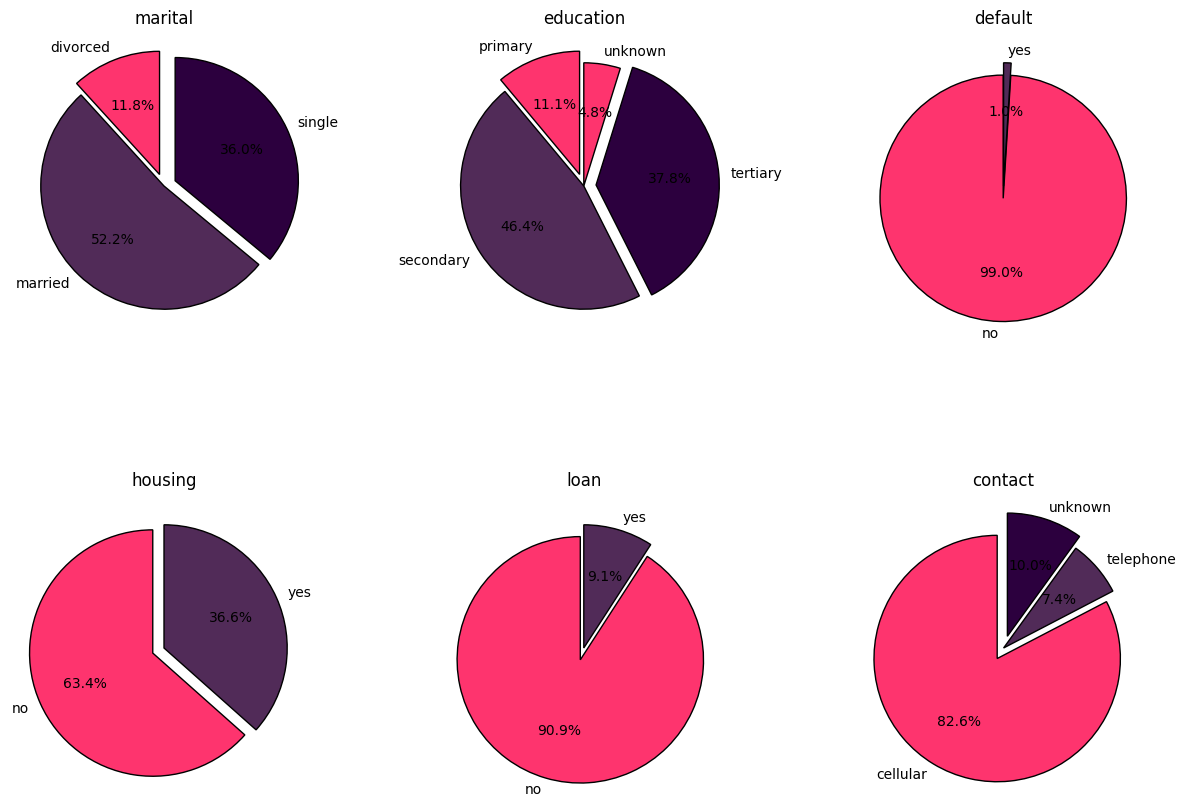

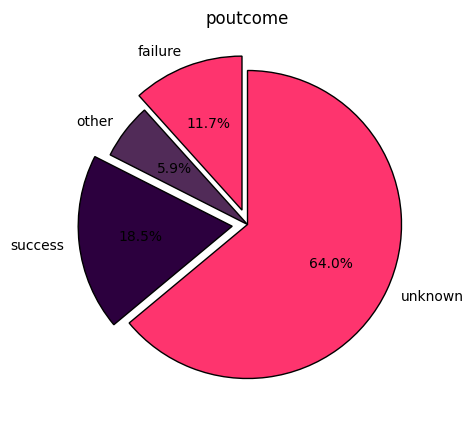

In [23]:
# Visualizing the percentage distribution of categorical features based on 'y' value being 1 (indicating 'Deposit') using pie charts

l1 = [marital, education, default, housing, loan, contact, poutcome]

ax,fig = plt.subplots(nrows = 2,ncols = 3,figsize = (15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i in range(6):
    if len(l1[i]) == 2:
        plt.subplot(2,3,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(data1[data1['y'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i])

    elif len(l1[i]) == 3:
        plt.subplot(2,3,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(data1[data1['y'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0, 0.1),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i])

    else:
        plt.subplot(2,3,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(data1[data1['y'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i])

ax,fig = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))
for i in range(-1,-2,-1):
    if len(l1[i]) == 4:
        plt.subplot(1,1,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(data1[data1['y'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0, 0.1, 0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i])

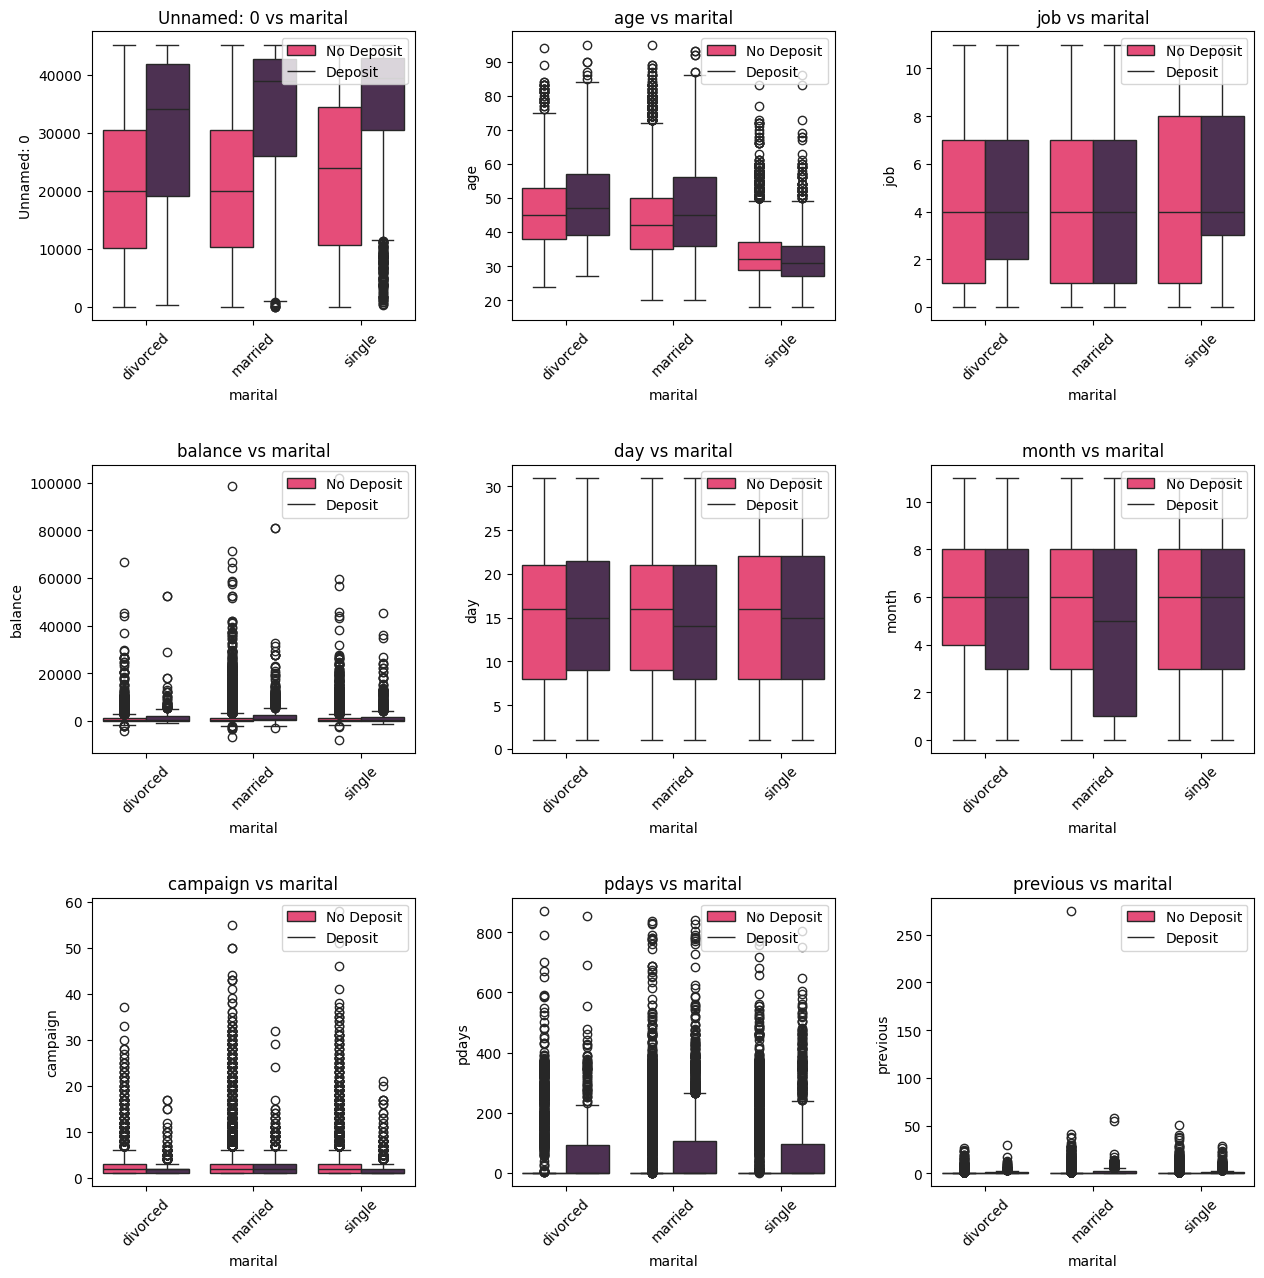

In [24]:
# Visualizing the relationship between numerical features and the 'marital' feature using box plots

fig = plt.subplots(ncols = 3,nrows = 3,figsize = (15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(x = 'marital',y = numerical_features[i],data = data1,hue = 'y',palette = colors)
    ax.set_xticklabels([tf1['marital'][j] for j in sorted(data1['marital'].unique())])
    title = numerical_features[i] + ' vs marital'
    plt.legend(['No Deposit','Deposit'], loc = 'upper right')
    plt.xticks(rotation=45)
    plt.title(title)

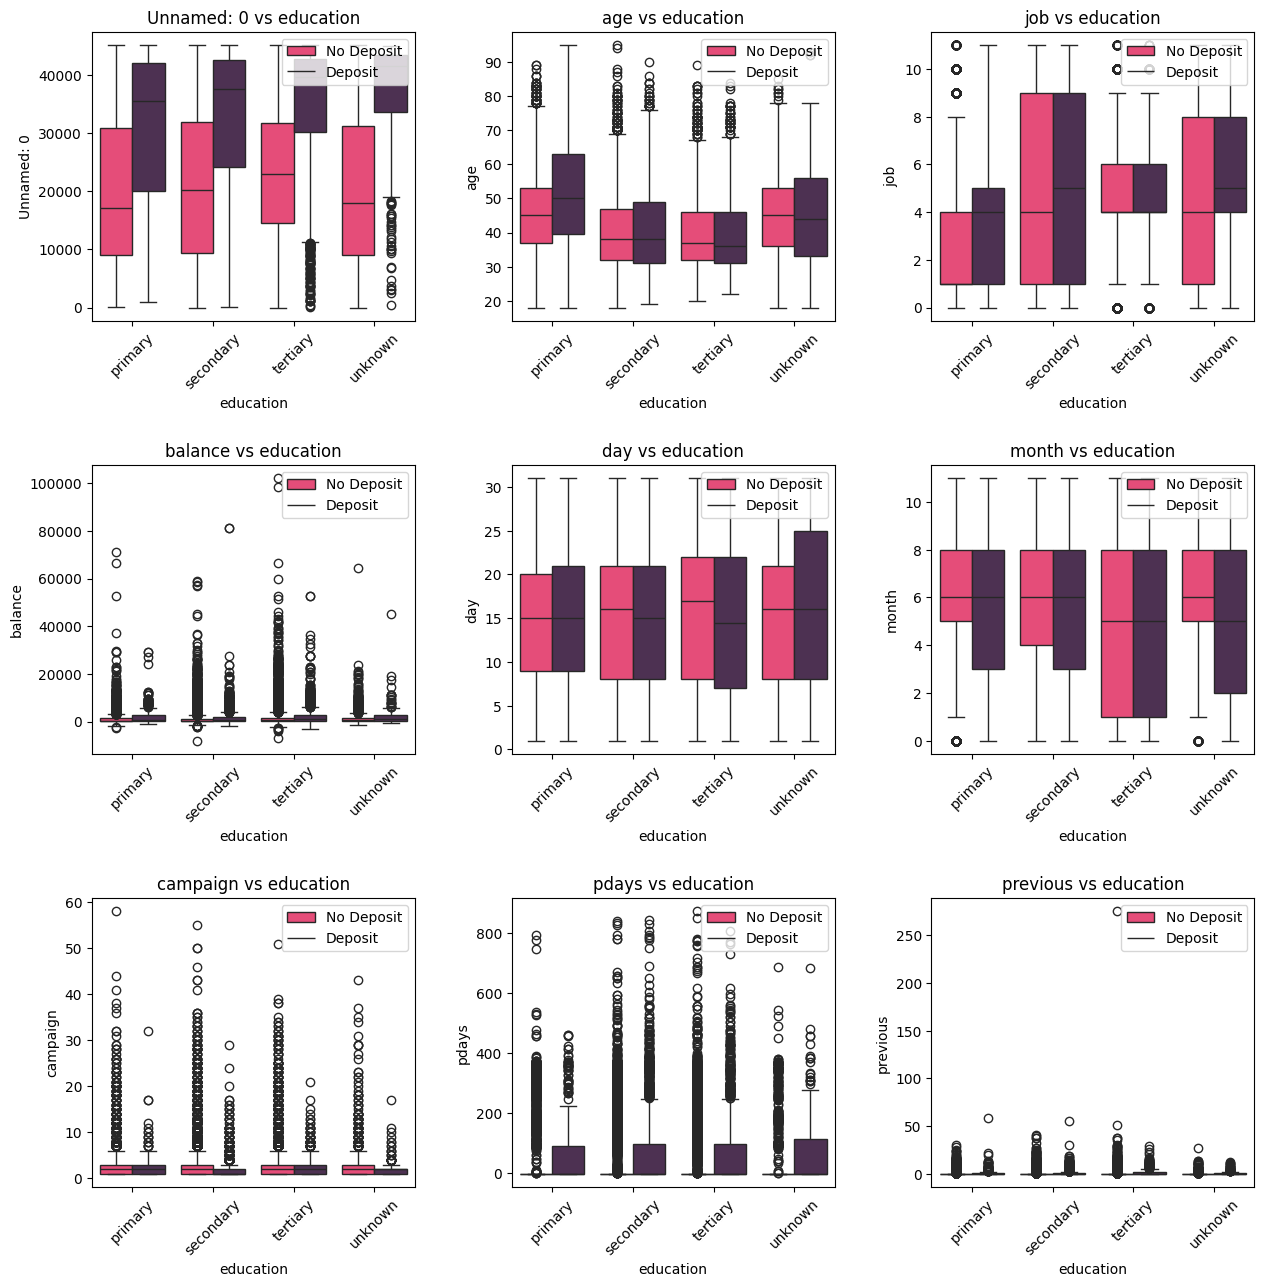

In [25]:
# Visualizing the relationship between numerical features and the 'education' feature using box plots

fig = plt.subplots(ncols = 3,nrows = 3,figsize = (15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(x = 'education',y = numerical_features[i],data = data1,hue = 'y',palette = colors)
    ax.set_xticklabels([tf1['education'][j] for j in sorted(data1['education'].unique())])
    title = numerical_features[i] + ' vs education'
    plt.legend(['No Deposit','Deposit'], loc = 'upper right')
    plt.xticks(rotation=45)
    plt.title(title)

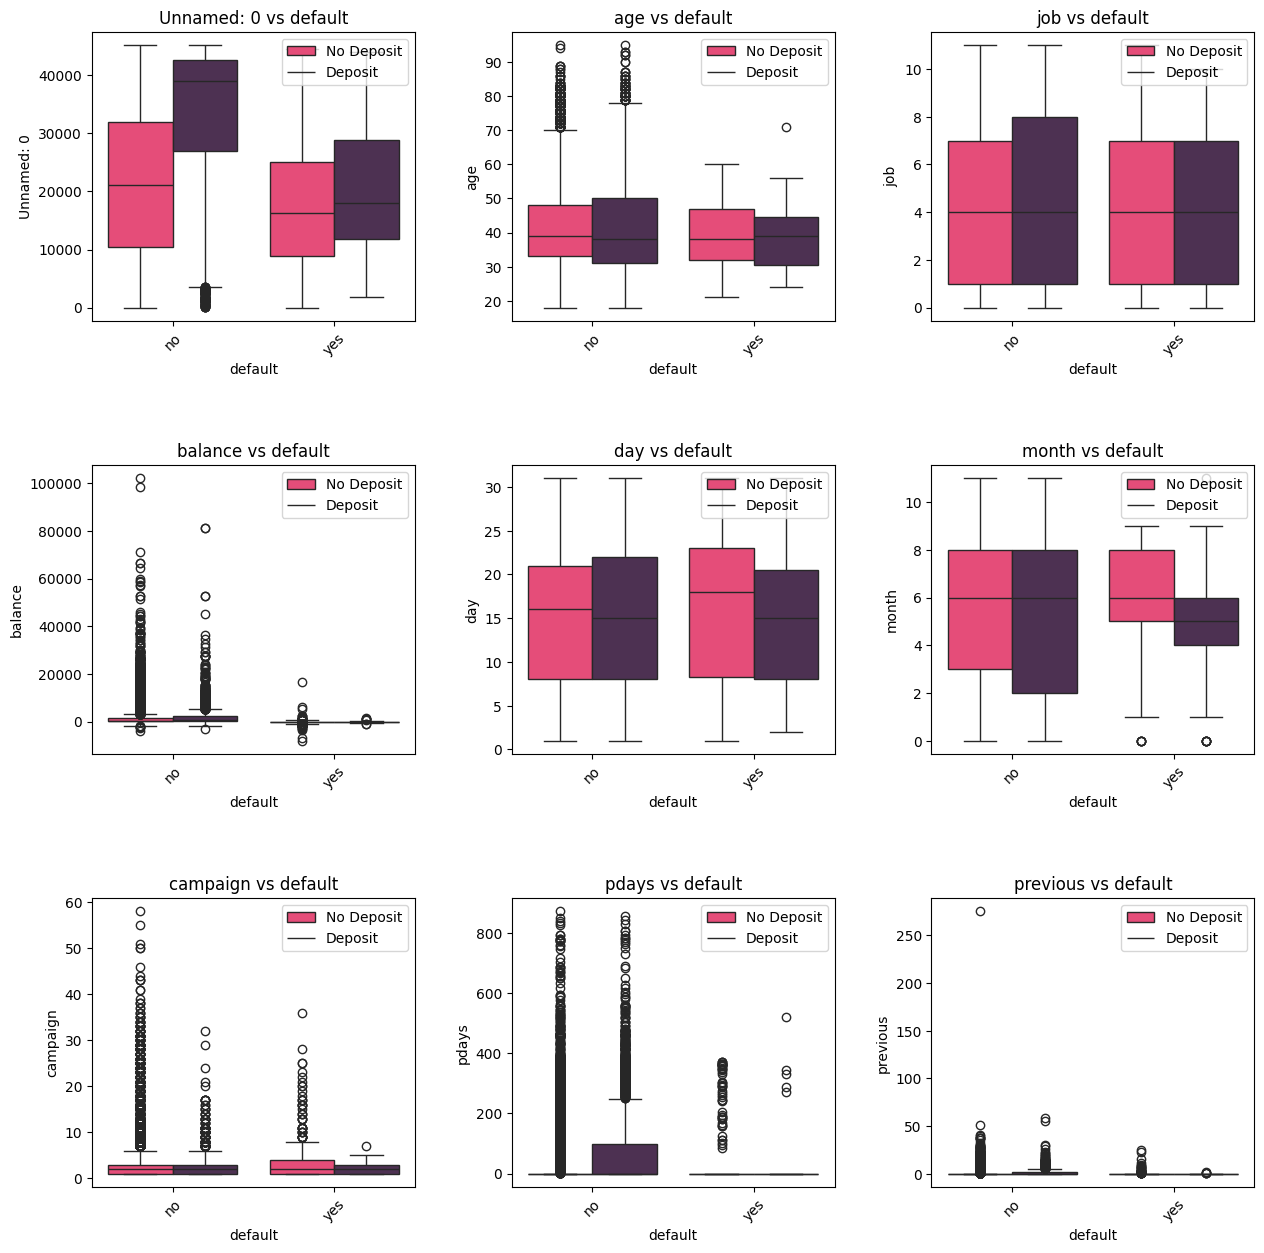

In [26]:
# Visualizing the relationship between numerical features and the 'default' feature using box plots

fig = plt.subplots(ncols = 3,nrows = 3,figsize = (15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(x = 'default',y = numerical_features[i],data = data1,hue = 'y',palette = colors)
    ax.set_xticklabels([tf1['default'][j] for j in sorted(data1['default'].unique())])
    title = numerical_features[i] + ' vs default'
    plt.legend(['No Deposit','Deposit'], loc = 'upper right')
    plt.xticks(rotation=45)
    plt.title(title)

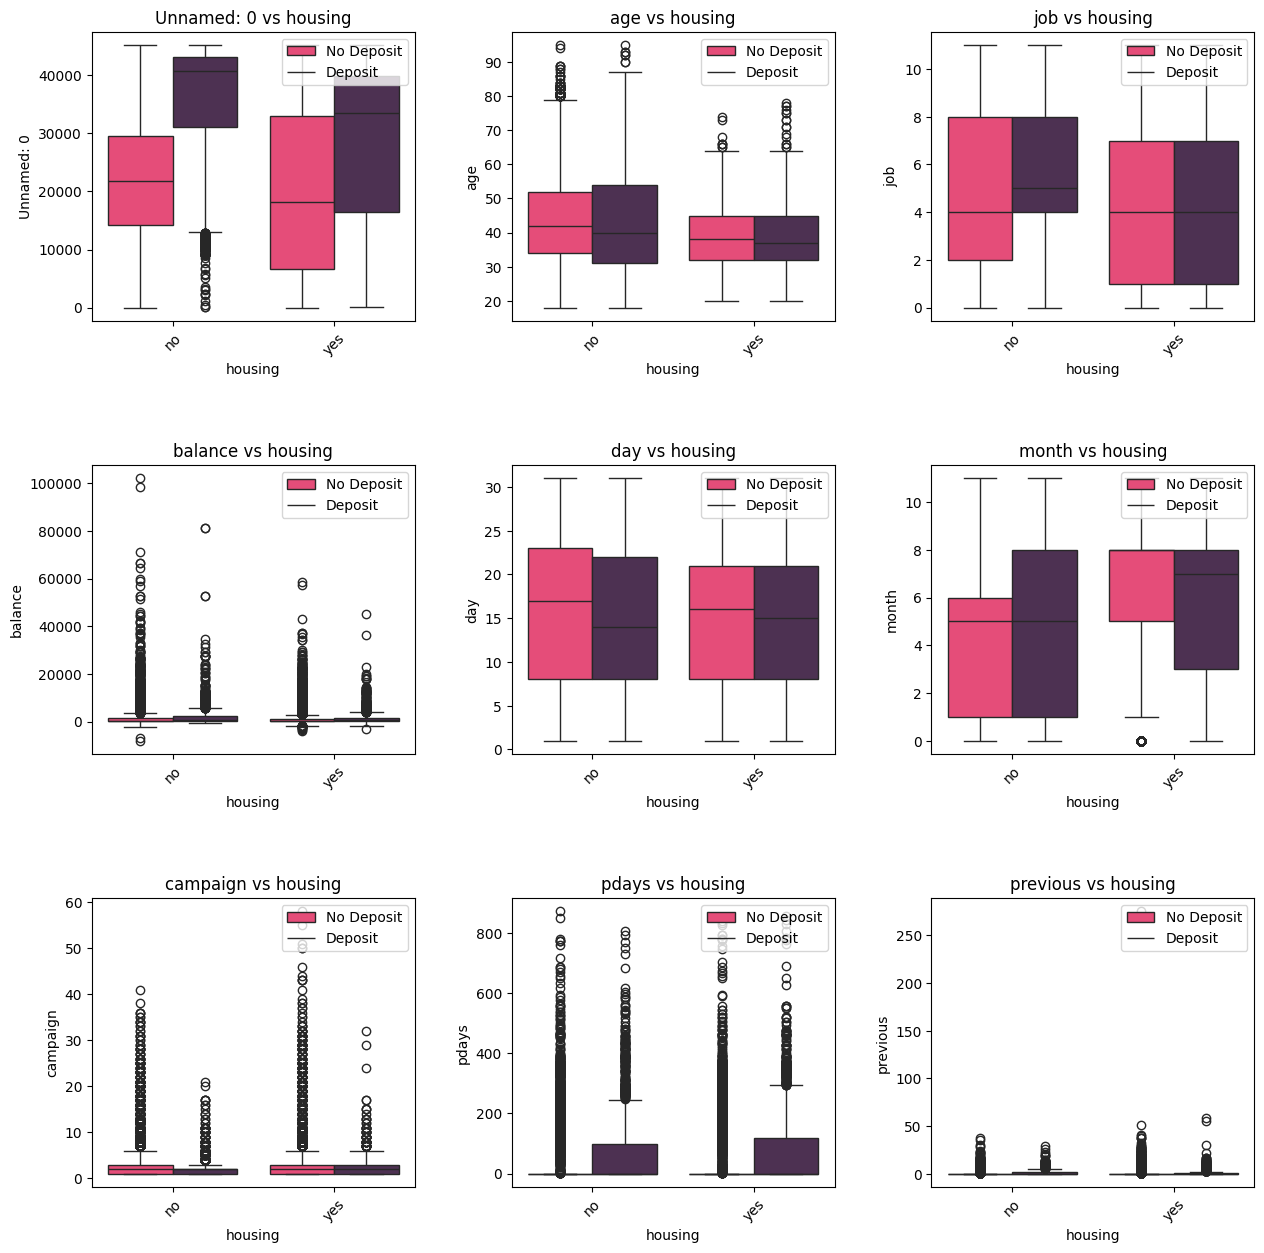

In [27]:
# Visualizing the relationship between numerical features and the 'housing' feature using box plots

fig = plt.subplots(ncols = 3,nrows = 3,figsize = (15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(x = 'housing',y = numerical_features[i],data = data1,hue = 'y',palette = colors)
    ax.set_xticklabels([tf1['housing'][j] for j in sorted(data1['housing'].unique())])
    title = numerical_features[i] + ' vs housing'
    plt.legend(['No Deposit','Deposit'], loc = 'upper right')
    plt.xticks(rotation=45)
    plt.title(title)

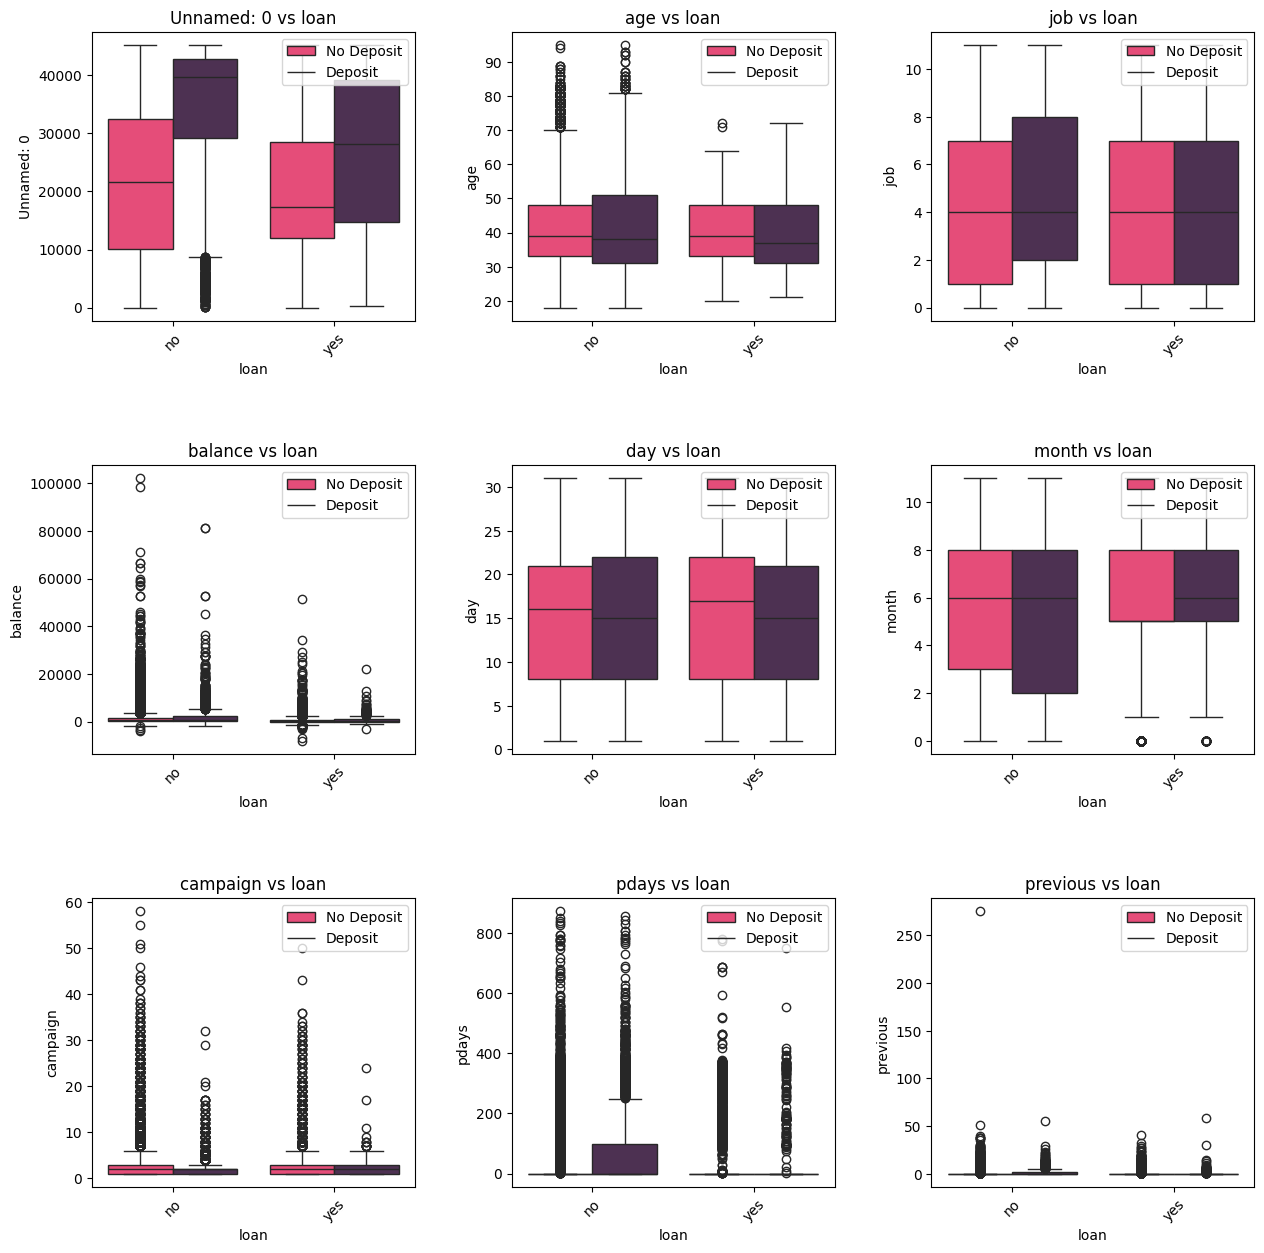

In [28]:
# Visualizing the relationship between numerical features and the 'loan' feature using box plots

fig = plt.subplots(ncols = 3,nrows = 3,figsize = (15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(x = 'loan',y = numerical_features[i],data = data1,hue = 'y',palette = colors)
    ax.set_xticklabels([tf1['loan'][j] for j in sorted(data1['loan'].unique())])
    title = numerical_features[i] + ' vs loan'
    plt.legend(['No Deposit','Deposit'], loc = 'upper right')
    plt.xticks(rotation=45)
    plt.title(title)

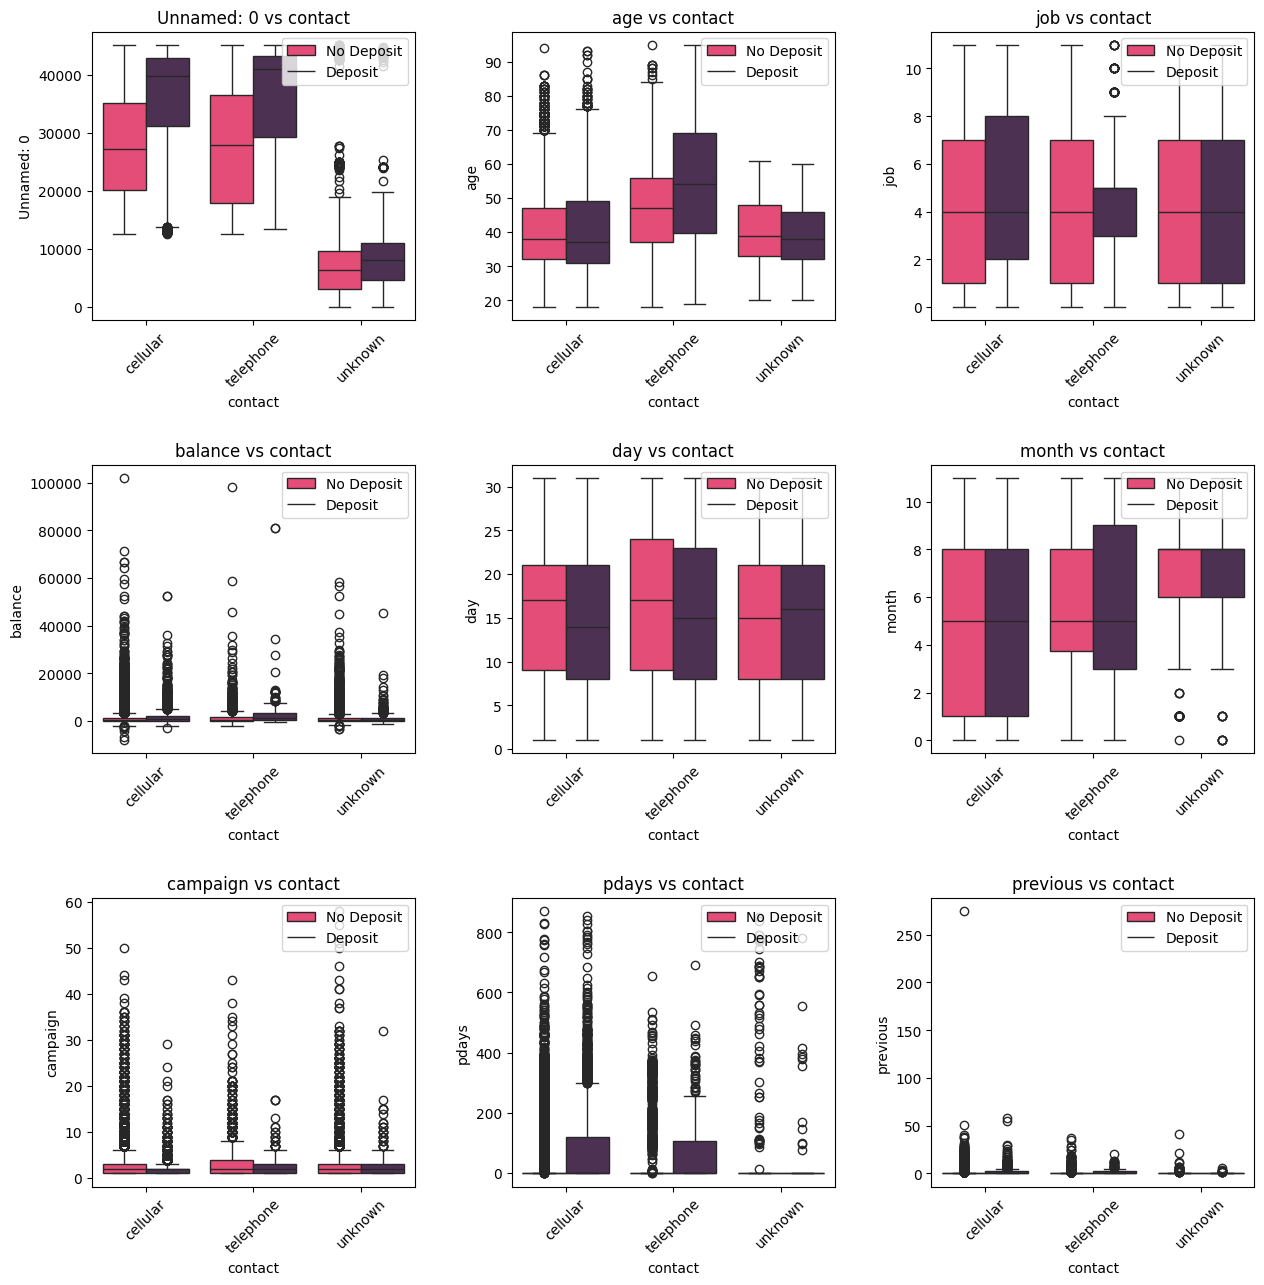

In [29]:
# Visualizing the relationship between numerical features and the 'contact' feature using box plots

fig = plt.subplots(ncols = 3,nrows = 3,figsize = (15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(x = 'contact',y = numerical_features[i],data = data1,hue = 'y',palette = colors)
    ax.set_xticklabels([tf1['contact'][j] for j in sorted(data1['contact'].unique())])
    title = numerical_features[i] + ' vs contact'
    plt.legend(['No Deposit','Deposit'], loc = 'upper right')
    plt.xticks(rotation=45)
    plt.title(title)

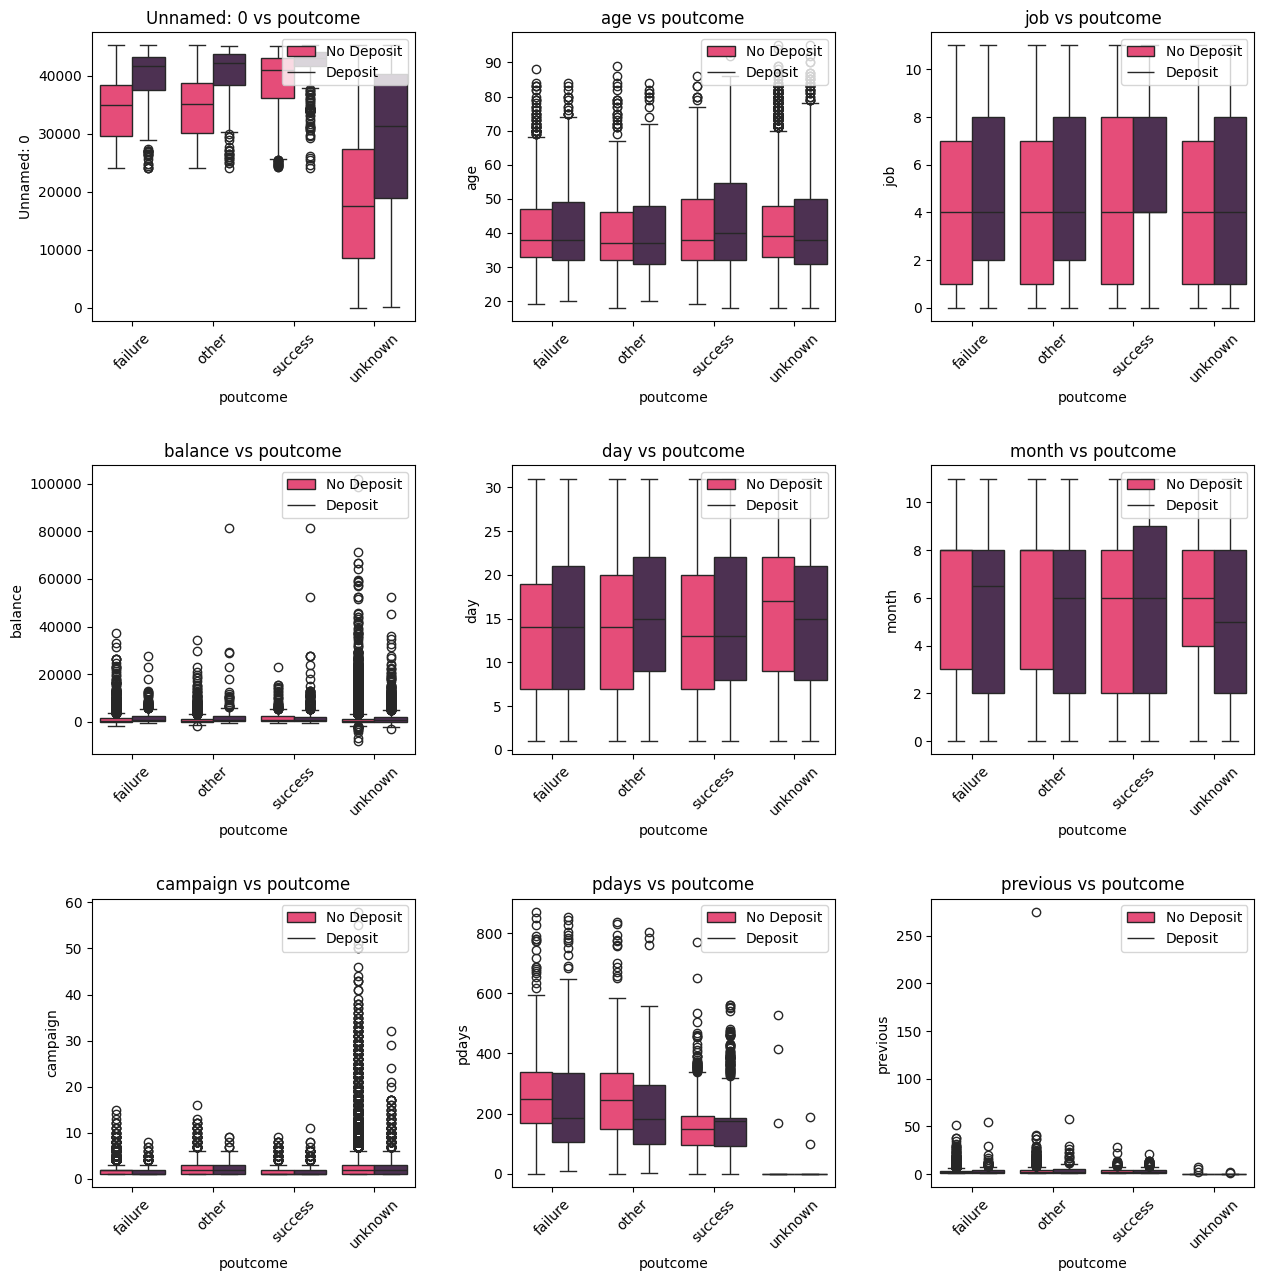

In [30]:
# Visualizing the relationship between numerical features and the 'poutcome' feature using box plots

fig = plt.subplots(ncols = 3,nrows = 3,figsize = (15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(x = 'poutcome',y = numerical_features[i],data = data1,hue = 'y',palette = colors)
    ax.set_xticklabels([tf1['poutcome'][j] for j in sorted(data1['poutcome'].unique())])
    title = numerical_features[i] + ' vs poutcome'
    plt.legend(['No Deposit','Deposit'], loc = 'upper right')
    plt.xticks(rotation=45)
    plt.title(title)

In [31]:
# Normalizing and standardizing the numerical and categorical features in the dataset

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
data1['job'] = mms.fit_transform(data1[['job']])
data1['balance'] = mms.fit_transform(data1[['balance']])
data1['day'] = mms.fit_transform(data1[['day']])
data1['month'] = mms.fit_transform(data1[['month']])
data1['campaign'] = mms.fit_transform(data1[['campaign']])
data1['pdays'] = mms.fit_transform(data1[['pdays']])
data1['previous'] = mms.fit_transform(data1[['previous']])
data1['age'] = mms.fit_transform(data1[['age']])


# Standardization
data1['marital'] = ss.fit_transform(data1[['marital']])
data1['education'] = ss.fit_transform(data1[['education']])
data1['default'] = ss.fit_transform(data1[['default']])
data1['housing'] = ss.fit_transform(data1[['housing']])
data1['loan'] = ss.fit_transform(data1[['loan']])
data1['contact'] = ss.fit_transform(data1[['contact']])
data1['poutcome'] = ss.fit_transform(data1[['poutcome']])
data1.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0,0.519481,0.363636,-0.276159,1.035389,-0.135146,0.092259,0.894373,-0.436591,1.515073,0.133333,0.727273,0.0,0.0,0.0,0.445161,0
1,1,0.337662,0.818182,1.369074,-0.302413,-0.135146,0.073067,0.894373,-0.436591,1.515073,0.133333,0.727273,0.0,0.0,0.0,0.445161,0
2,2,0.194805,0.181818,-0.276159,-0.302413,-0.135146,0.072822,0.894373,2.290471,1.515073,0.133333,0.727273,0.0,0.0,0.0,0.445161,0
3,3,0.376623,0.090909,-0.276159,2.373190,-0.135146,0.086476,0.894373,-0.436591,1.515073,0.133333,0.727273,0.0,0.0,0.0,0.445161,0
4,4,0.194805,1.000000,1.369074,2.373190,-0.135146,0.072812,-1.118102,-0.436591,1.515073,0.133333,0.727273,0.0,0.0,0.0,0.445161,0


In [32]:
# Performing a chi-square test on categorical variables to identify statistically significant variables

from scipy import stats

square_test_on_cat_vars = []

for categ_var in categorical_features:
  crosstab = pd.crosstab(data1[categ_var], data1['y'], margins=False)
  stat, p, dof, expected = stats.chi2_contingency(crosstab.values)

  if p < 0.05 :
    square_test_on_cat_vars.append(categ_var)

square_test_on_cat_vars

['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [33]:
# Determining the statistical significance of the analysis of variance (ANOVA) test for a categorical variable and a dependent variable

def determine_sig_anova(categ_var, dv):


    levels = data[categ_var].unique()
    all_types = []
    for level in levels:
        prog_dur_days = data1[data1[categ_var] == level][dv].values
        all_types.append(prog_dur_days)


    pval = stats.f_oneway(*all_types)[1]
    if pval < 0.05:
        return True
    else:
        return False

In [34]:
# Identifying statistically significant quantitative variables using the ANOVA test with the target variable 'y'

stat_sig_quant_vars_placed = []


for quant_var in numerical_features:
    if determine_sig_anova('y', quant_var):
        stat_sig_quant_vars_placed.append(quant_var)

stat_sig_quant_vars_placed

['Unnamed: 0',
 'age',
 'job',
 'balance',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous']

In [35]:
# Performing oversampling and undersampling using SMOTE and RandomUnderSampler techniques to address class imbalance

over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.4)
f1 = data1.drop(columns=['y'])
t1 = data1['y']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 12990, 1: 12990})

In [55]:
from imblearn.over_sampling import RandomOverSampler

# Assuming df_filtered is your DataFrame containing the imbalanced data
# and 'y' is the target variable

# Separate features and target variable
X = data1.drop('y', axis=1)
y = data1['y']

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after oversampling
print(pd.Series(y_resampled).value_counts())


y
0    39015
1    39015
Name: count, dtype: int64


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression())  
])


scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=5)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.84249648 0.83147507 0.57734205 0.54190696 0.38811995]
Mean cross-validation score: 0.6362681020120466


In [60]:
bank_test= pd.read_csv(r'C:\Users\aksha\Downloads\Hw3\hw3-classification-challenge-akshay2904\data\bank_test.csv')
bank_test_encode = pd.get_dummies(bank_test[['default', 'housing', 'loan']])

bank_test_encoded = pd.concat([bank_test, bank_test_encode], axis=1)

bank_test_encoded.drop(['default', 'housing', 'loan'], axis=1, inplace=True)
print(bank_test_encoded.head())


   Unnamed: 0  age           job   marital  education  balance    contact  \
0       42442   52  entrepreneur   married    primary      657  telephone   
1       30164   34   blue-collar   married  secondary        0   cellular   
2        9921   38     housemaid  divorced    primary      359    unknown   
3       31817   58   blue-collar   married    primary      189  telephone   
4       10333   43      services   married  secondary     2478    unknown   

   day month  campaign  pdays  previous poutcome  default_no  default_yes  \
0    7   dec         2    217         1    other        True        False   
1    5   feb         6     -1         0  unknown        True        False   
2    9   jun         4     -1         0  unknown        True        False   
3    8   apr         1     -1         0  unknown        True        False   
4   12   jun         1     -1         0  unknown        True        False   

   housing_no  housing_yes  loan_no  loan_yes  
0        True        False

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_test_encoded['job']=le.fit_transform(bank_test_encoded['job'])
bank_test_encoded['education']=le.fit_transform(bank_test_encoded['education'])
bank_test_encoded['poutcome']=le.fit_transform(bank_test_encoded['poutcome'])


In [62]:
X = data1.drop('y', axis=1)
y = data1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

X_test_preprocessed = preprocessor.transform(X_test)
y_pred = clf.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))


NameError: name 'SimpleImputer' is not defined

In [36]:
# Splitting the resampled data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.3, random_state=101)

In [37]:
# Defining a function to train and evaluate a machine learning classifier model

def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))



# Defining a function to evaluate the performance of a machine learning classifier model
def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))





# Defining a function to plot the Receiver Operating Characteristic (ROC) curve
def plot_roc_curve(y_true, y_scores):
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_true, y_scores)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [38]:
# Initializing an XGBoost classifier with specific hyperparameters

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  91.44%
ROC_AUC Score :  84.96%
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3925
           1       0.89      0.80      0.84      3869

    accuracy                           0.85      7794
   macro avg       0.85      0.85      0.85      7794
weighted avg       0.85      0.85      0.85      7794



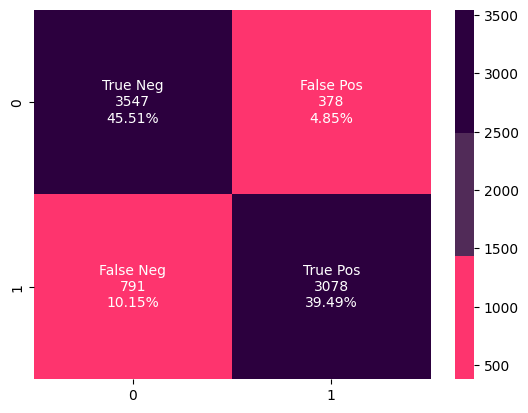

In [39]:
# Training, evaluating, and evaluating the performance of an XGBoost classifier model

model(classifier_xgb,x_train,y_train,x_test,y_test)
model_evaluation(classifier_xgb,x_test,y_test)

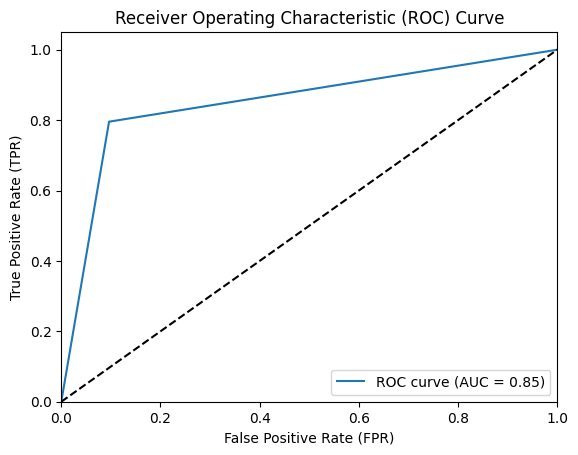

In [40]:
# Making predictions using the XGBoost classifier and plotting the ROC curve

prediction_xgb = classifier_xgb.predict(x_test)
plot_roc_curve(y_test, prediction_xgb)

In [41]:
# Initializing a Logistic Regression classifier with specific hyperparameters

classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Cross Validation Score :  77.02%
ROC_AUC Score :  70.92%
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      3925
           1       0.70      0.73      0.71      3869

    accuracy                           0.71      7794
   macro avg       0.71      0.71      0.71      7794
weighted avg       0.71      0.71      0.71      7794



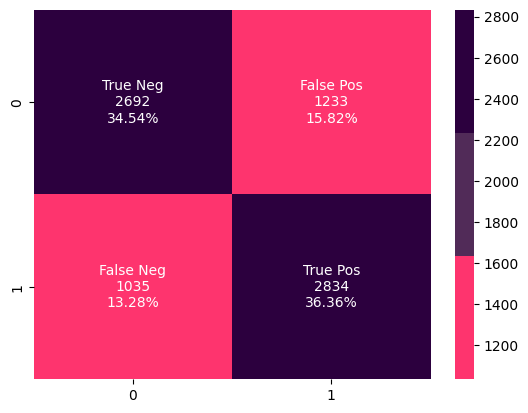

In [42]:
# Training, evaluating, and evaluating the performance of a Logistic Regression classifier model

model(classifier_lr,x_train,y_train,x_test,y_test)
model_evaluation(classifier_lr,x_test,y_test)

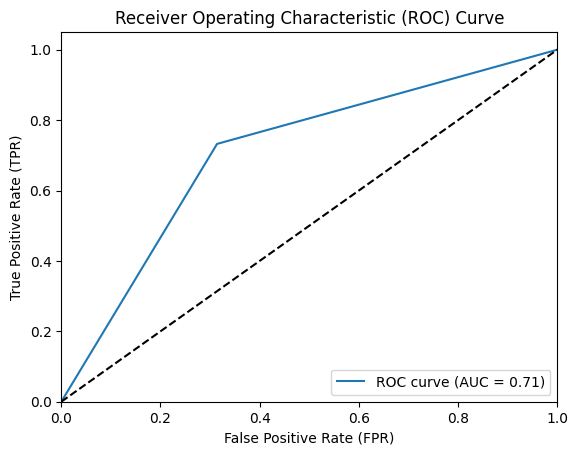

In [43]:
# Making predictions using the Logistic Regression classifier and plotting the ROC curve

prediction_lr = classifier_lr.predict(x_test)
plot_roc_curve(y_test, prediction_lr)

In [44]:
# Initializing a Support Vector Classifier (SVC) with specific hyperparameters

classifier_svc = SVC(kernel = 'linear',C = 0.1)

In [45]:
# Initializing a Decision Tree Classifier with specific hyperparameters

classifier_tree = DecisionTreeClassifier(random_state=101, criterion='entropy', max_depth=4, min_samples_leaf=3)

Cross Validation Score :  83.84%
ROC_AUC Score :  78.08%
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      3925
           1       0.86      0.67      0.75      3869

    accuracy                           0.78      7794
   macro avg       0.80      0.78      0.78      7794
weighted avg       0.80      0.78      0.78      7794



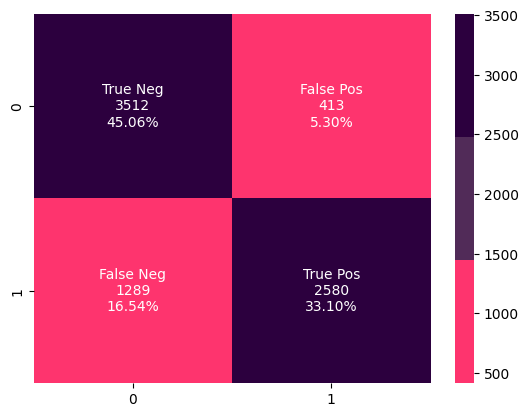

In [46]:
# Training, evaluating, and evaluating the performance of a Decision Tree Classifier model

model(classifier_tree,x_train,y_train,x_test,y_test)
model_evaluation(classifier_tree,x_test,y_test)

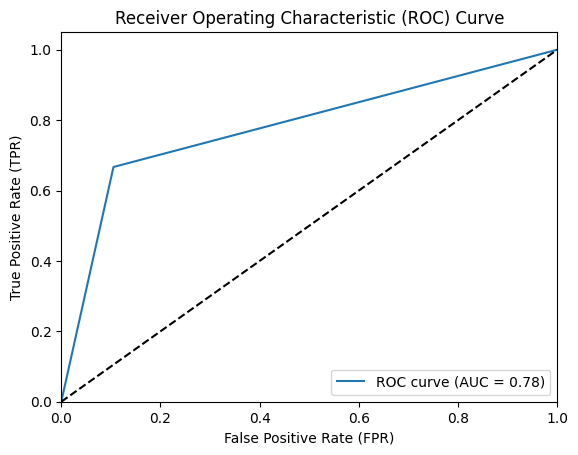

In [47]:
# Making predictions using the Decision Tree Classifier and plotting the ROC curve

prediction_tree = classifier_tree.predict(x_test)
plot_roc_curve(y_test, prediction_tree)

In [48]:
# Initializing a K-Nearest Neighbors Classifier with specific hyperparameters

classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Cross Validation Score :  81.77%
ROC_AUC Score :  75.06%
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      3925
           1       0.73      0.79      0.76      3869

    accuracy                           0.75      7794
   macro avg       0.75      0.75      0.75      7794
weighted avg       0.75      0.75      0.75      7794



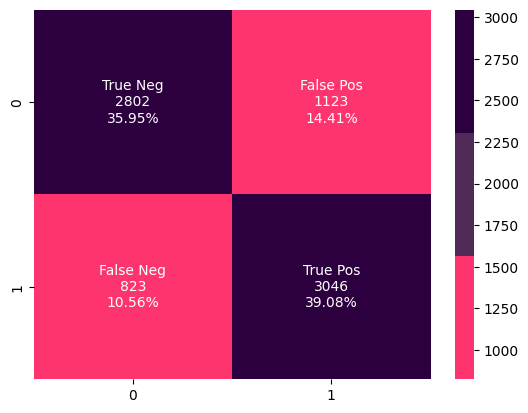

In [49]:
# Training, evaluating, and evaluating the performance of a K-Nearest Neighbors (KNN) Classifier model

model(classifier_knn,x_train,y_train,x_test,y_test)
model_evaluation(classifier_knn,x_test,y_test)

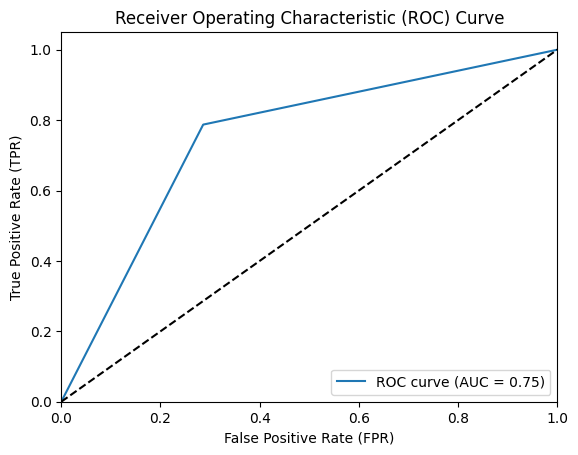

In [50]:
# Making predictions using the K-Nearest Neighbors (KNN) Classifier and plotting the ROC curve

prediction_knn = classifier_knn.predict(x_test)
plot_roc_curve(y_test, prediction_knn)

In [51]:
# Initializing a Random Forest Classifier with specific hyperparameters

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  86.50%
ROC_AUC Score :  78.82%
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      3925
           1       0.86      0.69      0.76      3869

    accuracy                           0.79      7794
   macro avg       0.80      0.79      0.79      7794
weighted avg       0.80      0.79      0.79      7794



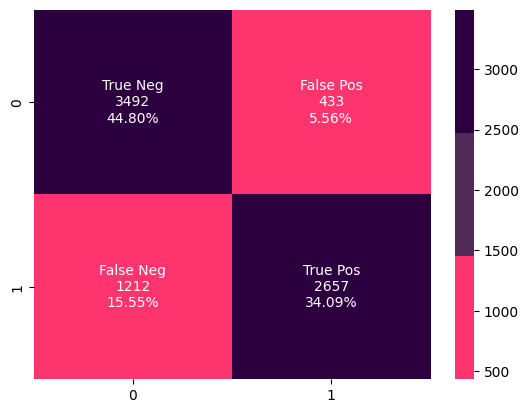

In [52]:
# Training, evaluating, and evaluating the performance of a Random Forest Classifier model

model(classifier_rf,x_train,y_train,x_test,y_test)
model_evaluation(classifier_rf,x_test,y_test)

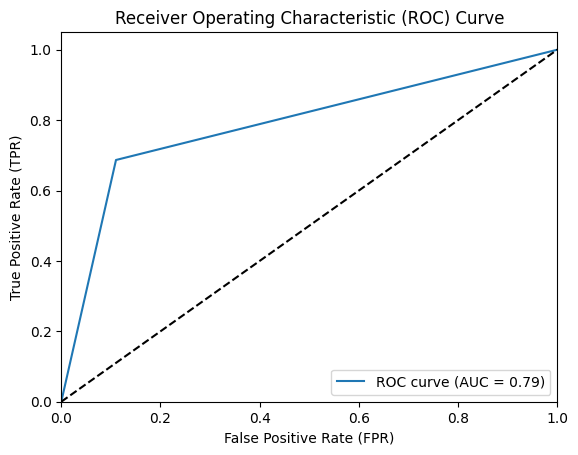

In [53]:
# Making predictions using the Random Forest Classifier and plotting the ROC curve

prediction_rf = classifier_rf.predict(x_test)
plot_roc_curve(y_test, prediction_rf)

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

X = data1.drop('y', axis=1)
y = data1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

X_test_preprocessed = preprocessor.transform(X_test)
y_pred = clf.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7854
           1       0.50      0.41      0.45       989

    accuracy                           0.89      8843
   macro avg       0.71      0.68      0.70      8843
weighted avg       0.88      0.89      0.88      8843



In [65]:
bank_test_preprocessed = preprocessor.transform(bank_test)
predictions_bank_test = clf.predict(bank_test_preprocessed)

predictions_bank_test_df = pd.DataFrame({'predicted_value': predictions_bank_test})
output_filename = 'answers.csv'
predictions_bank_test_df.to_csv(output_filename, index=False)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'entrepreneur'